* データマイニング特別演習 演習テーマ３ - yolov8による物体検出(サンプルデータの学習) -

1. google colaboratory のノートブックを開く<br>
(ランタイムのハードウェアアクセラレータをGPUに変更すると短時間で実行可能)
2. MS-COCO データのサブセットをダウンロードして展開
3. 作成済みの作業環境に移動
4. yolo v8 のモデルを利用し、MS-COCO データのサブセットの画像で物体検出を実施
5. 検出結果を表示

In [ ]:
# 2. MS-COCO データのサブセットをダウンロードして展開 (yolov8_09_mscoco.ipynb で作成)
%cd /content
! wget -O ms-coco-subset-sudspg-dmt3.tar.gz https://park.saitama-u.ac.jp/~khiramatsu/sudspg/ms-coco-subset-sudspg-dmt3.tar.gz
! tar xfvz ms-coco-subset-sudspg-dmt3.tar.gz

/content
--2023-06-29 09:24:32--  https://park.saitama-u.ac.jp/~khiramatsu/sudspg/ms-coco-subset-sudspg-dmt3.tar.gz
Resolving park.saitama-u.ac.jp (park.saitama-u.ac.jp)... 153.120.167.247
Connecting to park.saitama-u.ac.jp (park.saitama-u.ac.jp)|153.120.167.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161493226 (154M) [application/x-gzip]
Saving to: ‘ms-coco-subset-sudspg-dmt3.tar.gz’

ms-coco-subset-suds 100%[===================>] 154.01M  11.0MB/s    in 16s     

2023-06-29 09:24:49 (9.92 MB/s) - ‘ms-coco-subset-sudspg-dmt3.tar.gz’ saved [161493226/161493226]

datasets/
datasets/ms-coco-subset/
datasets/ms-coco-subset/images/
datasets/ms-coco-subset/images/train/
datasets/ms-coco-subset/images/train/000000006614.jpg
datasets/ms-coco-subset/images/train/000000076547.jpg
datasets/ms-coco-subset/images/train/000000060449.jpg
datasets/ms-coco-subset/images/train/000000034257.jpg
datasets/ms-coco-subset/images/train/000000008211.jpg
datasets/ms-coco-subse

In [ ]:
# 3. 作成済みの作業環境(google ドライブに作成したフォルダ)に移動
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/sudspg/ultralytics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/sudspg/ultralytics


In [ ]:
# 4. yolo v8 のモデルを利用し、MS-COCO データのサブセットの画像で物体検出を実施
from ultralytics import YOLO
import glob

model = YOLO("yolov8m.pt")
_project = '/content/drive/MyDrive/sudspg/ultralytics/runs/detect'
_name = "predict-ms-coco-subset-yolov8m"
_sources = glob.glob('/content/datasets/ms-coco-subset/images/test/*.jpg')
for _source in _sources:
  result = model.predict(source=_source,
                        project=_project,
                        name=_name,
                        exist_ok=True,
                        save=True,
                        save_txt=True, conf=0.2, iou=0.5)


image 1/200 /content/datasets/ms-coco-subset/images/test/000000093437.jpg: 384x640 1 person, 1 bicycle, 1 bottle, 1 bowl, 7 chairs, 2 potted plants, 1 dining table, 1 vase, 1179.3ms
image 2/200 /content/datasets/ms-coco-subset/images/test/000000093717.jpg: 448x640 20 persons, 1 bicycle, 6 skateboards, 1178.7ms
image 3/200 /content/datasets/ms-coco-subset/images/test/000000093965.jpg: 480x640 2 zebras, 1227.0ms
image 4/200 /content/datasets/ms-coco-subset/images/test/000000094157.jpg: 640x384 8 persons, 1 clock, 993.6ms
image 5/200 /content/datasets/ms-coco-subset/images/test/000000094185.jpg: 480x640 1 person, 9 teddy bears, 1219.8ms
image 6/200 /content/datasets/ms-coco-subset/images/test/000000094326.jpg: 640x480 1 person, 2 benchs, 2040.9ms
image 7/200 /content/datasets/ms-coco-subset/images/test/000000094336.jpg: 448x640 1 cat, 1 bottle, 1 sink, 1845.4ms
image 8/200 /content/datasets/ms-coco-subset/images/test/000000094614.jpg: 448x640 1 person, 1 backpack, 1 skis, 1297.1ms
image 

127


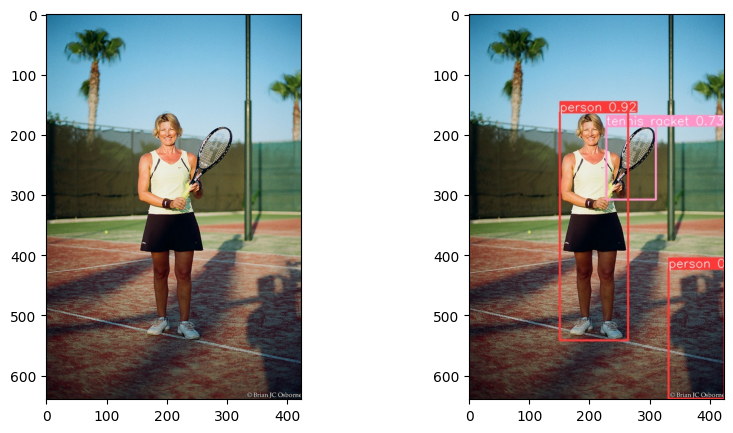

In [ ]:
# 5. 検出結果を表示
import os
import matplotlib.pyplot as plt
import cv2
import random

_sources = glob.glob('/content/datasets/ms-coco-subset/images/test/*.jpg')
_i = random.randint(0, len(_sources)-1)
print(_i)
_basename = os.path.basename(_sources[_i])
_result_dir = '/content/drive/MyDrive/sudspg/ultralytics/runs/detect/predict-ms-coco-subset-yolov8m'
_result_img = os.path.join(_result_dir, _basename)
if os.path.exists(_result_img):
  original_img = cv2.cvtColor(cv2.imread(_sources[_i]), cv2.COLOR_BGR2RGB)
  result_img = cv2.cvtColor(cv2.imread(_result_img), cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(original_img)
  plt.subplot(1, 2, 2)
  plt.imshow(result_img)